<h1 style="color:rgb(0,120,170)"><b>Master Thesis - Evaluating Offline Reinforcement Learning Under Suboptimal Data Quality: A Comparative Study of BC, BVE and IQL
</b></h1>
<h2 style="color:rgb(0,120,170)"><u>Part 3: Plotting</u></h2>

<b>Author:</b> Manuel Sperl<br>
<b>Date:</b> 2025

This notebook is part of my master’s thesis project. The goal is to generate diverse offline reinforcement learning (RL) datasets for evaluating three algorithms — Behavioral Cloning (BC), Behavior Value Estimation (BVE), and Implicit Q-Learning (IQL) — under varying data quality conditions.

Offline RL methods rely entirely on pre-collected data and cannot interact with the environment during training. As such, the quality and nature of the dataset play a critical role in downstream performance. In the last part of this project, we will plot the results of the training runs from the previous parts.

In this notebook, we will define functions to plot the training results of the RL algorithms. The plots will visualize the rewards achieved by each algorithm across different data quality conditions, allowing for a comparative analysis of their performance.

<div class="alert alert-info">

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is structured to be executed from start to finish. Before you begin, ensure that all necessary packages are installed.
</div>

<h3 style="color:rgb(0,120,170)">Imports</h3>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import cosine_similarity

<div id='rewards_plotting''>
<h2 style="color:rgb(0,120,170)">Reward Plotting on all Datasets</h2>

In this section, we will plot the rewards achieved by each algorithm across different data quality conditions. The plots will visualize the performance of Behavioral Cloning (BC), Behavior Value Estimation (BVE), and Implicit Q-Learning (IQL) on the datasets generated in the previous parts of this project.

In [ ]:
def plot_model_rewards_grouped_by_quality(stats_paths_groups, group_titles, labels=None, model_name="Generic", average_over_epochs=True, episodes_per_epoch=15, show_std_shading=True):
    """
    Plots the mean rewards of multiple model runs grouped by quality.

    :param stats_paths_groups: List of lists, where each sublist contains paths to stats files for a group of runs.
    :param group_titles: Titles for each group of runs.
    :param labels: Optional list of labels for each run. 
    :param model_name: Name of the model to be displayed in the plot title.
    :param average_over_epochs: If True, averages rewards over epochs; otherwise, over steps.
    :param episodes_per_epoch: Number of episodes per epoch if averaging over epochs.
    :param show_std_shading: If True, shows standard deviation shading around the mean reward.
    """
    assert len(stats_paths_groups) == len(group_titles), "Mismatch between groups and titles"

    if labels is None:
        labels = [f"Run {i+1}" for i in range(len(stats_paths_groups[0]))]

    def moving_average(x, window=5):
        return np.convolve(x, np.ones(window) / window, mode='valid')

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    for idx, (paths, title) in enumerate(zip(stats_paths_groups, group_titles)):
        ax = axes[idx]
        stats_list = [pickle.load(open(path, "rb")) for path in paths]

        all_x_max = []

        for i, stats in enumerate(stats_list):
            rewards = stats["rewards"]
            color = colors[i % len(colors)]

            if average_over_epochs:
                min_epochs = min(len(r) // episodes_per_epoch for r in rewards)
                epoch_rewards = [
                    [np.mean(r[j * episodes_per_epoch: (j + 1) * episodes_per_epoch]) for j in range(min_epochs)]
                    for r in rewards
                ]
                epoch_rewards = np.array(epoch_rewards)
                mean_reward = epoch_rewards.mean(axis=0)
                std_reward = epoch_rewards.std(axis=0)
                x_vals = list(range(1, min_epochs + 1))
            else:
                min_len = min(len(r) for r in rewards)
                smoothed = [moving_average(np.array(r), window=5)[:min_len] for r in rewards]
                smoothed = np.array(smoothed)
                mean_reward = smoothed.mean(axis=0)
                std_reward = smoothed.std(axis=0)
                x_vals = list(range(len(mean_reward)))

            all_x_max.append(x_vals[-1])
            ax.plot(x_vals, mean_reward, label=labels[i], color=color)
            if show_std_shading:
                ax.fill_between(x_vals, mean_reward - std_reward, mean_reward + std_reward, color=color, alpha=0.3)

        max_x = max(all_x_max)
        x_pad = max(0.25, int(max_x * 0.03))
        ax.set_xlim([x_vals[0] - x_pad, max_x + x_pad])
        ax.set_xticks(np.linspace(x_vals[0], max_x, num=10, dtype=int))

        ax.set_title(f"{model_name} – {title}")
        ax.set_xlabel("Epoch" if average_over_epochs else "Step")
        if idx == 0:
            ax.set_ylabel("Mean Reward")
        ax.grid(True)
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

<h4>Behavioral Cloning (BC)</h4>

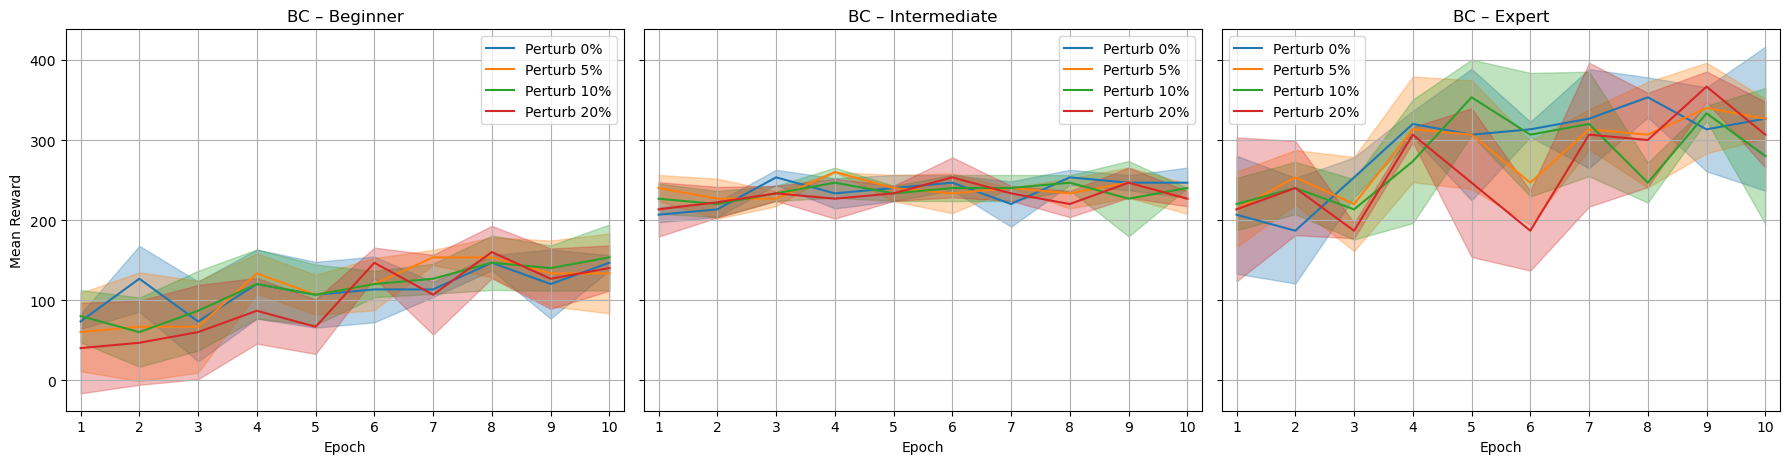

In [ ]:
paths_beginner = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

labels = ["Perturb 0%", "Perturb 5%", "Perturb 10%", "Perturb 20%"]
group_titles = ["Beginner", "Intermediate", "Expert"]

plot_model_rewards_grouped_by_quality(
    stats_paths_groups=[paths_beginner, paths_intermediate, paths_expert],
    group_titles=group_titles,
    labels=labels,
    model_name="BC",
    average_over_epochs=True,
    episodes_per_epoch=15
)


<h4>Behavior Value Estimation (BVE)</h4>

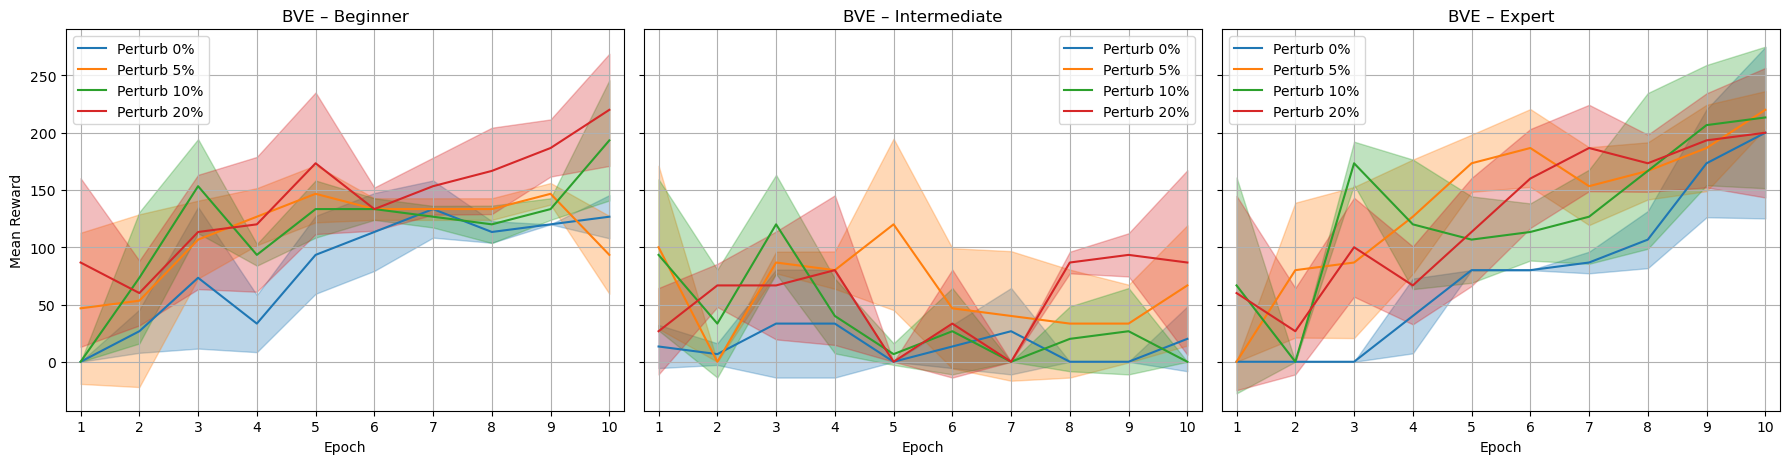

In [41]:
paths_beginner = [
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

labels = ["Perturb 0%", "Perturb 5%", "Perturb 10%", "Perturb 20%"]
group_titles = ["Beginner", "Intermediate", "Expert"]

plot_model_rewards_grouped_by_quality(
    stats_paths_groups=[paths_beginner, paths_intermediate, paths_expert],
    group_titles=group_titles,
    labels=labels,
    model_name="BVE",
    average_over_epochs=True,
    episodes_per_epoch=15
)


<h4>Implicit Q-Learning (IQL)</h4>

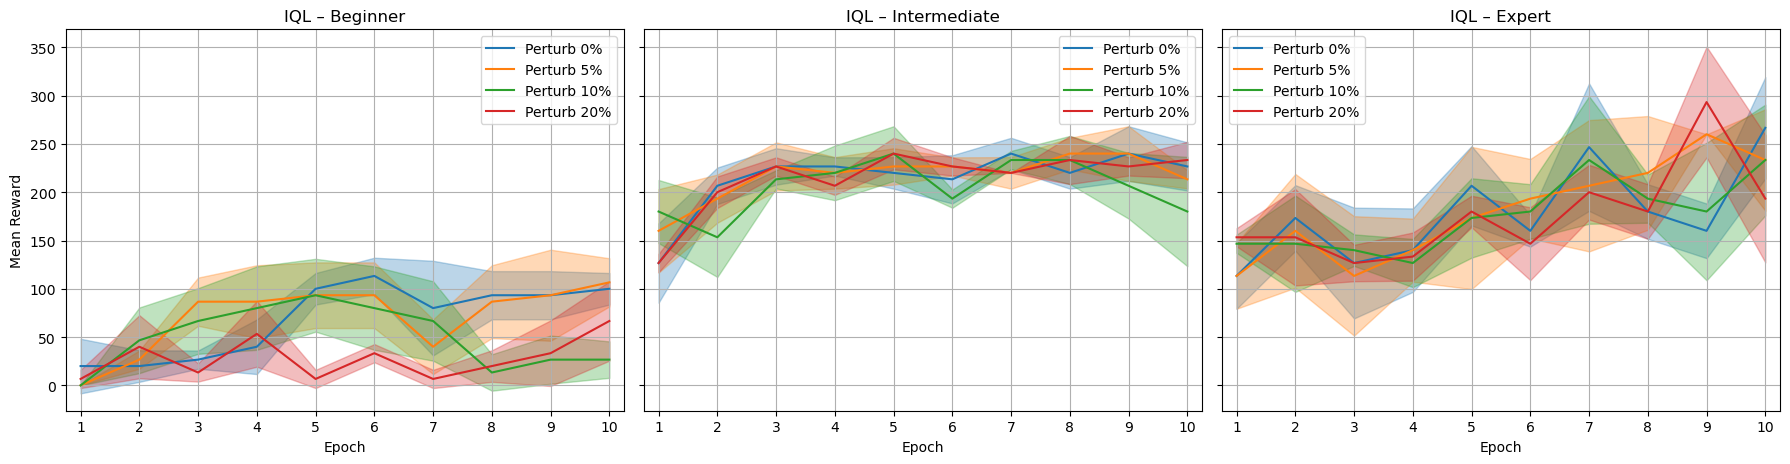

In [42]:
paths_beginner = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

labels = ["Perturb 0%", "Perturb 5%", "Perturb 10%", "Perturb 20%"]
group_titles = ["Beginner", "Intermediate", "Expert"]

plot_model_rewards_grouped_by_quality(
    stats_paths_groups=[paths_beginner, paths_intermediate, paths_expert],
    group_titles=group_titles,
    labels=labels,
    model_name="IQL",
    average_over_epochs=True,
    episodes_per_epoch=15
)


<h4>All models, compared on 0%</h4>

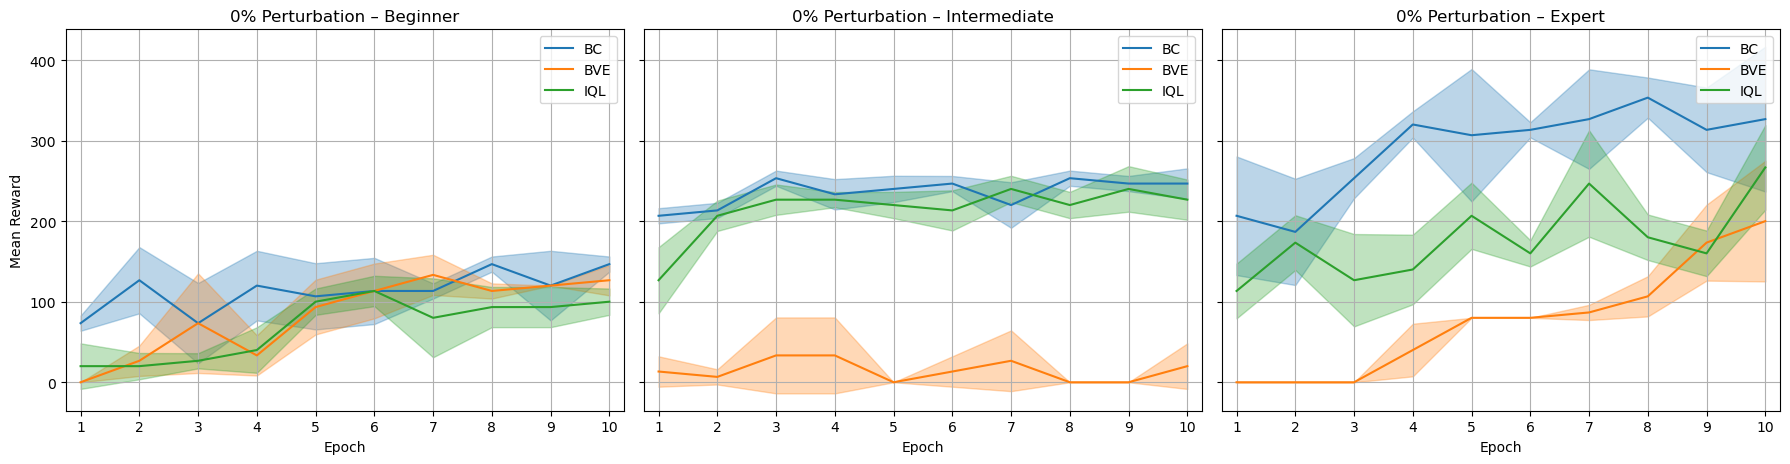

In [ ]:
paths_beginner = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
]

paths_intermediate = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
]

paths_expert = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
]

labels = ["BC", "BVE", "IQL"]
group_titles = ["Beginner", "Intermediate", "Expert"]

plot_model_rewards_grouped_by_quality(
    stats_paths_groups=[paths_beginner, paths_intermediate, paths_expert],
    group_titles=group_titles,
    labels=labels,
    model_name="0% Perturbation",
    average_over_epochs=True,
    episodes_per_epoch=15
)


<div id='loss_plotting'>
<h2 style="color:rgb(0,120,170)">Loss Plotting on all Datasets</h2>

In this section, we will plot the losses achieved by each algorithm across different data quality conditions. The plots will visualize the training and validation losses of Behavioral Cloning (BC), Behavior Value Estimation (BVE), and Implicit Q-Learning (IQL) on the datasets generated in the previous parts of this project.

In [ ]:
def load_stats(paths):
    """
    Load BC stats from multiple perturbation paths and return a dict with
    train losses and steps for each perturb level.

    :param paths: List of paths to the stats files.
    :return: Dictionary with perturbation levels as keys and stats as values.
    """
    all_losses = {}
    for path in paths:
        with open(path, "rb") as f:
            stats = pickle.load(f)

        # extract perturbation level as int from filename (e.g., 'stats_perturb10.pkl' -> 10)
        filename = os.path.basename(path)
        level = int(filename.replace("stats_perturb", "").replace(".pkl", ""))
        
        all_losses[level] = {
            'train_losses': stats['train_losses'],
            'train_steps': stats['train_steps'],
            'val_losses': stats['val_losses'],
            'val_steps': stats['val_steps'],
        }
    return all_losses

In [ ]:
def plot_bc_train_losses(paths, title, window_size=100):
    """
    Plot the training losses of BC models from multiple paths.

    :param paths: List of paths to the stats files.
    :param title: Title for the plot.
    :param window_size: Size of the moving average window for smoothing.
    """
    all_losses = load_stats(paths)
    plt.figure(figsize=(10, 6))

    for perturb_level, data in sorted(all_losses.items()):
        losses = data['train_losses']
        steps = data['train_steps']
        
        # trim to minimum length
        min_len = min(len(l) for l in losses)
        losses = [l[:min_len] for l in losses]
        steps = [s[:min_len] for s in steps]

        losses_np = np.array(losses)
        steps_np = steps[0]

        # smooth each trial individually
        smoothed = []
        for run in losses:
            run_smoothed = np.convolve(run, np.ones(window_size) / window_size, mode='valid')
            smoothed.append(run_smoothed)

        smoothed = np.array(smoothed)
        smoothed_steps = steps_np[window_size - 1:]

        # mean and std after smoothing
        mean = np.mean(smoothed, axis=0)
        std = np.std(smoothed, axis=0)

        plt.plot(smoothed_steps, mean, label=f"{perturb_level}%")
        plt.fill_between(smoothed_steps, mean - std, mean + std, alpha=0.2)

    plt.title(title)
    plt.xlabel("Gradient Steps")
    plt.ylabel("Train Loss (log scale)")
    plt.yscale("log")
    plt.legend(title="Perturbation")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

<h4>Behavioral Cloning (BC) - Train losses</h4>

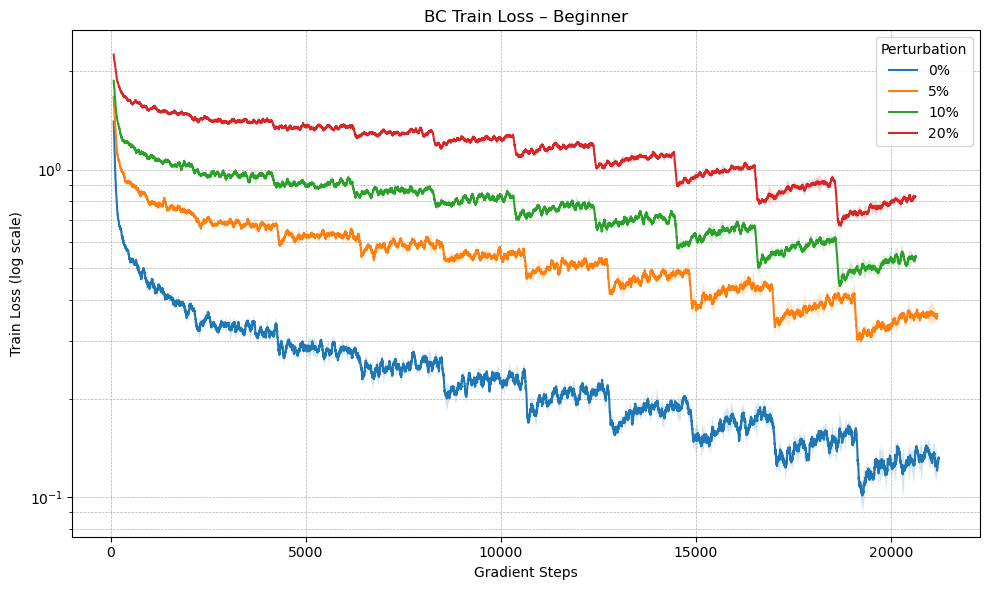

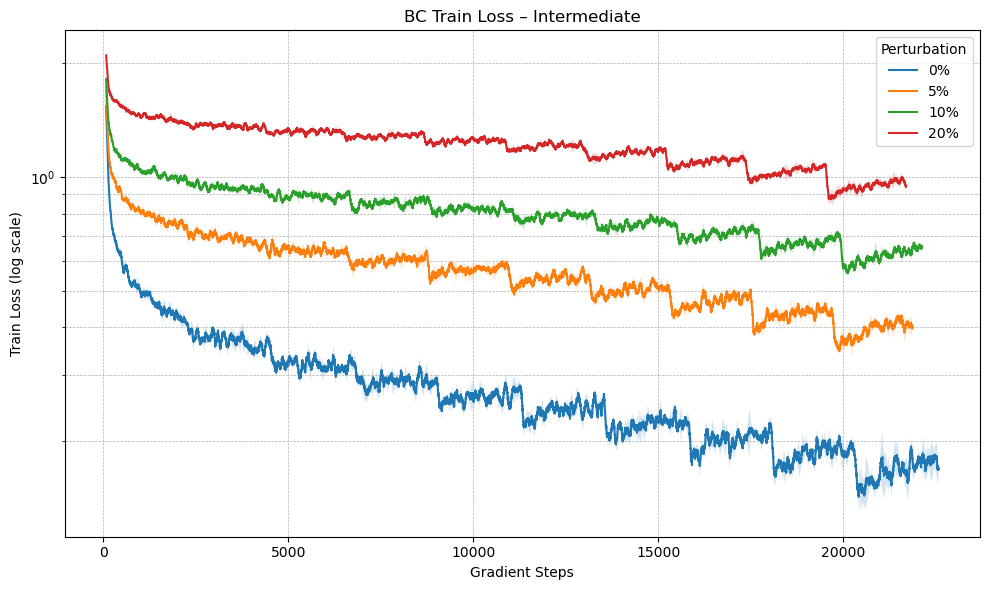

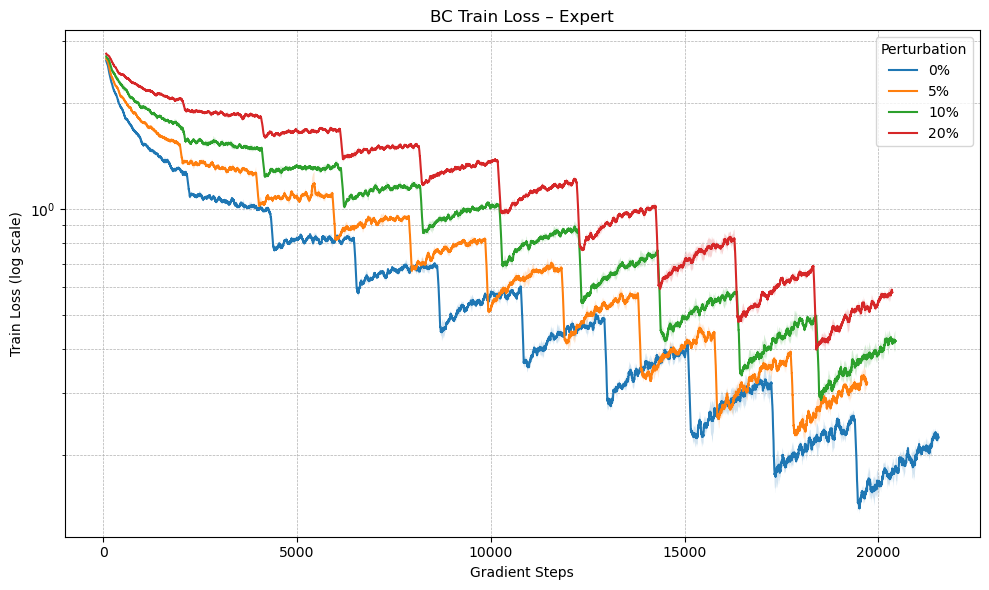

In [ ]:
paths_beginner = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

plot_bc_train_losses(paths_beginner, title="BC Train Loss – Beginner", window_size=75)
plot_bc_train_losses(paths_intermediate, title="BC Train Loss – Intermediate", window_size=75)
plot_bc_train_losses(paths_expert, title="BC Train Loss – Expert", window_size=75)

<h4>Behavior Value Estimation (BVE) - Train losses</h4>

In [ ]:
def plot_bve_train_losses(paths, title, window_size=100):
    """
    Plot the training losses of BVE models from multiple paths.

    :param paths: List of paths to the stats files.
    :param title: Title for the plot.
    :param window_size: Size of the moving average window for smoothing.
    """
    all_losses = load_stats(paths)
    plt.figure(figsize=(10, 6))

    for perturb_level, data in sorted(all_losses.items()):
        losses = data['train_losses']
        steps = data['train_steps']

        # trim to minimum length
        min_len = min(len(l) for l in losses)
        losses = [l[:min_len] for l in losses]
        steps = [s[:min_len] for s in steps]
        steps_np = steps[0]

        # smooth each trial individually
        smoothed = []
        for run in losses:
            run_smoothed = np.convolve(run, np.ones(window_size) / window_size, mode='valid')
            smoothed.append(run_smoothed)

        smoothed = np.array(smoothed)
        smoothed_steps = steps_np[window_size - 1:]

        # mean and standard deviation
        mean = np.mean(smoothed, axis=0)
        std = np.std(smoothed, axis=0)

        plt.plot(smoothed_steps, mean, label=f"{perturb_level}%")
        plt.fill_between(smoothed_steps, mean - std, mean + std, alpha=0.25)

    plt.title(title)
    plt.xlabel("Gradient Steps")
    plt.ylabel("Train Loss (log scale)")
    plt.yscale("log")
    plt.legend(title="Perturbation")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

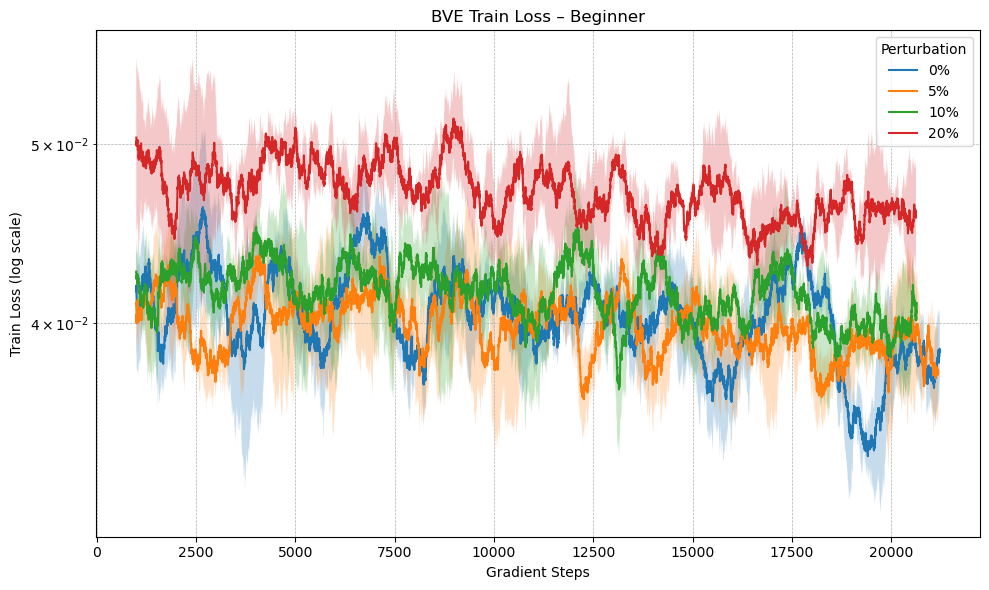

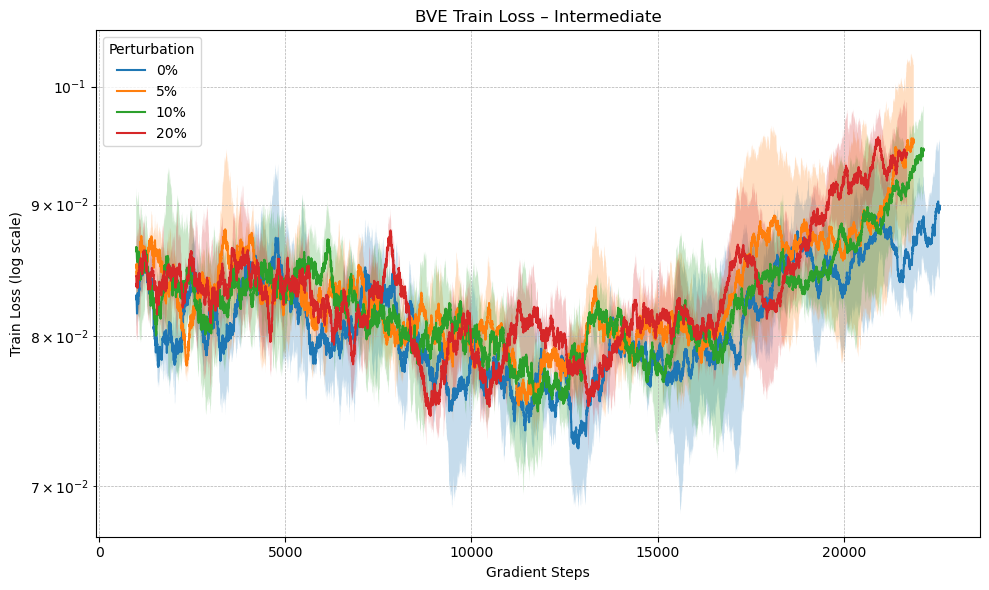

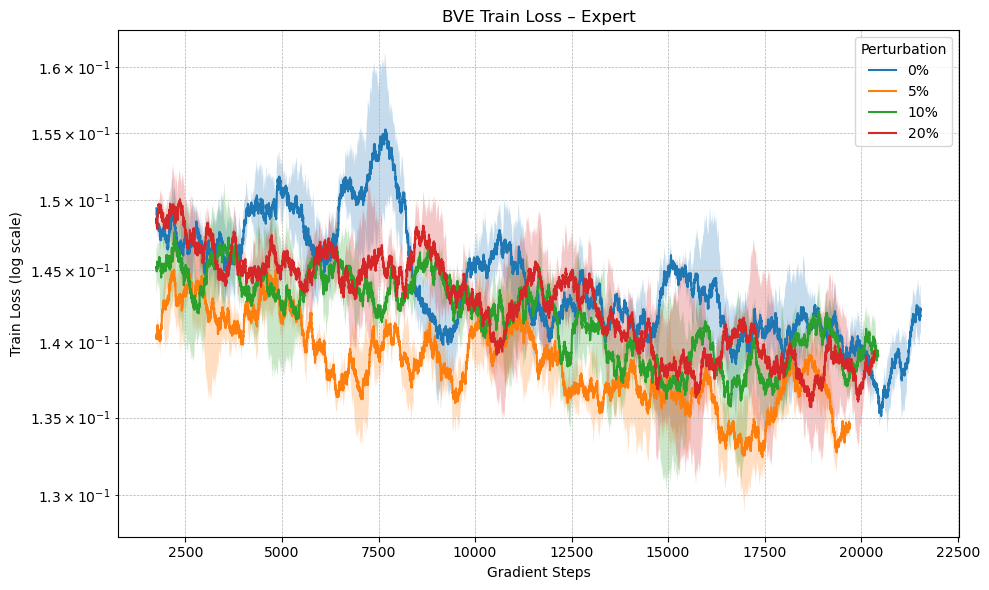

In [ ]:
paths_beginner = [
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

plot_bve_train_losses(paths_beginner, title="BVE Train Loss – Beginner", window_size=1000)
plot_bve_train_losses(paths_intermediate, title="BVE Train Loss – Intermediate", window_size=1000)
plot_bve_train_losses(paths_expert, title="BVE Train Loss – Expert", window_size=1750)

<h4>Implicit Q-Learning (IQL) - Train losses</h4>

In [ ]:
def load_stats(paths):
    """
    Load IQL stats from multiple perturbation paths and return a dict with
    train losses and steps for each perturb level.

    :param paths: List of paths to the stats files.
    :return: Dictionary with perturbation levels as keys and stats as values.
    """
    all_stats = {}
    for path in paths:
        with open(path, "rb") as f:
            stats = pickle.load(f)
        level = path.split("_")[-1].replace(".pkl", "")
        all_stats[level] = stats
    return all_stats

def plot_iql_train_losses(paths, title, window_size=10):
    """
    Plot the training losses of IQL models from multiple paths.

    :param paths: List of paths to the stats files.
    :param title: Title for the plot.
    :param window_size: Size of the moving average window for smoothing.
    """
    all_stats = load_stats(paths)
    loss_keys = ['actor_losses', 'critic1_losses', 'critic2_losses', 'value_losses']
    step_keys = ['actor_steps', 'critic1_steps', 'critic2_steps', 'value_steps']
    titles = ['Actor Loss', 'Critic 1 Loss', 'Critic 2 Loss', 'Value Loss']

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, (loss_key, step_key, subplot_title) in enumerate(zip(loss_keys, step_keys, titles)):
        ax = axes[i]

        for perturb_level, stats in sorted(all_stats.items(), key=lambda x: int(x[0].replace("perturb", ""))):
            losses = stats[loss_key]
            steps = stats[step_key]

            min_len = min(len(l) for l in losses)
            losses = [l[:min_len] for l in losses]
            steps = [s[:min_len] for s in steps]
            steps_np = steps[0]

            smoothed = []
            for run in losses:
                smoothed_run = np.convolve(run, np.ones(window_size) / window_size, mode='valid')
                smoothed.append(smoothed_run)

            smoothed = np.array(smoothed)
            smoothed_steps = steps_np[window_size - 1:]

            mean = smoothed.mean(axis=0)
            std = smoothed.std(axis=0)

            ax.plot(smoothed_steps, mean, label=f"{perturb_level}%")
            ax.fill_between(smoothed_steps, mean - std, mean + std, alpha=0.25)

        ax.set_title(subplot_title)
        ax.set_xlabel("Gradient Steps")
        ax.set_ylabel("Train Loss (log scale)")
        ax.set_yscale("log")
        ax.grid(True, which="both", linestyle="--", linewidth=0.5)

    handles, labels = ax.get_legend_handles_labels()
    labels = [label.replace('perturb', '') for label in labels]  # clean up labels
    fig.legend(handles, labels, ncol=len(labels), title="Perturbation", loc="upper right")

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.975])
    plt.show()

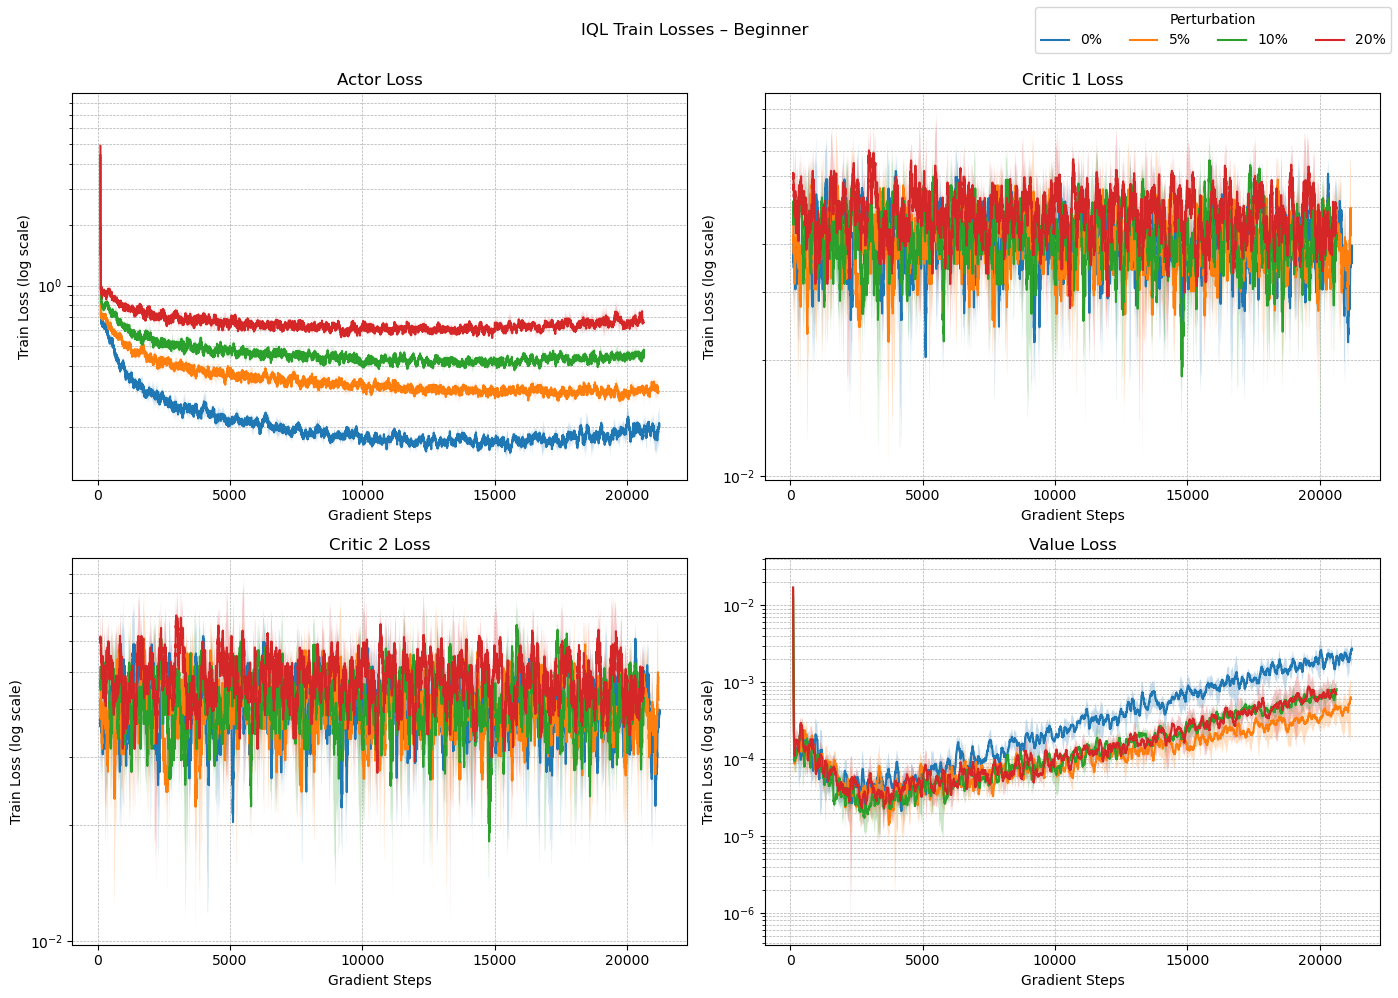

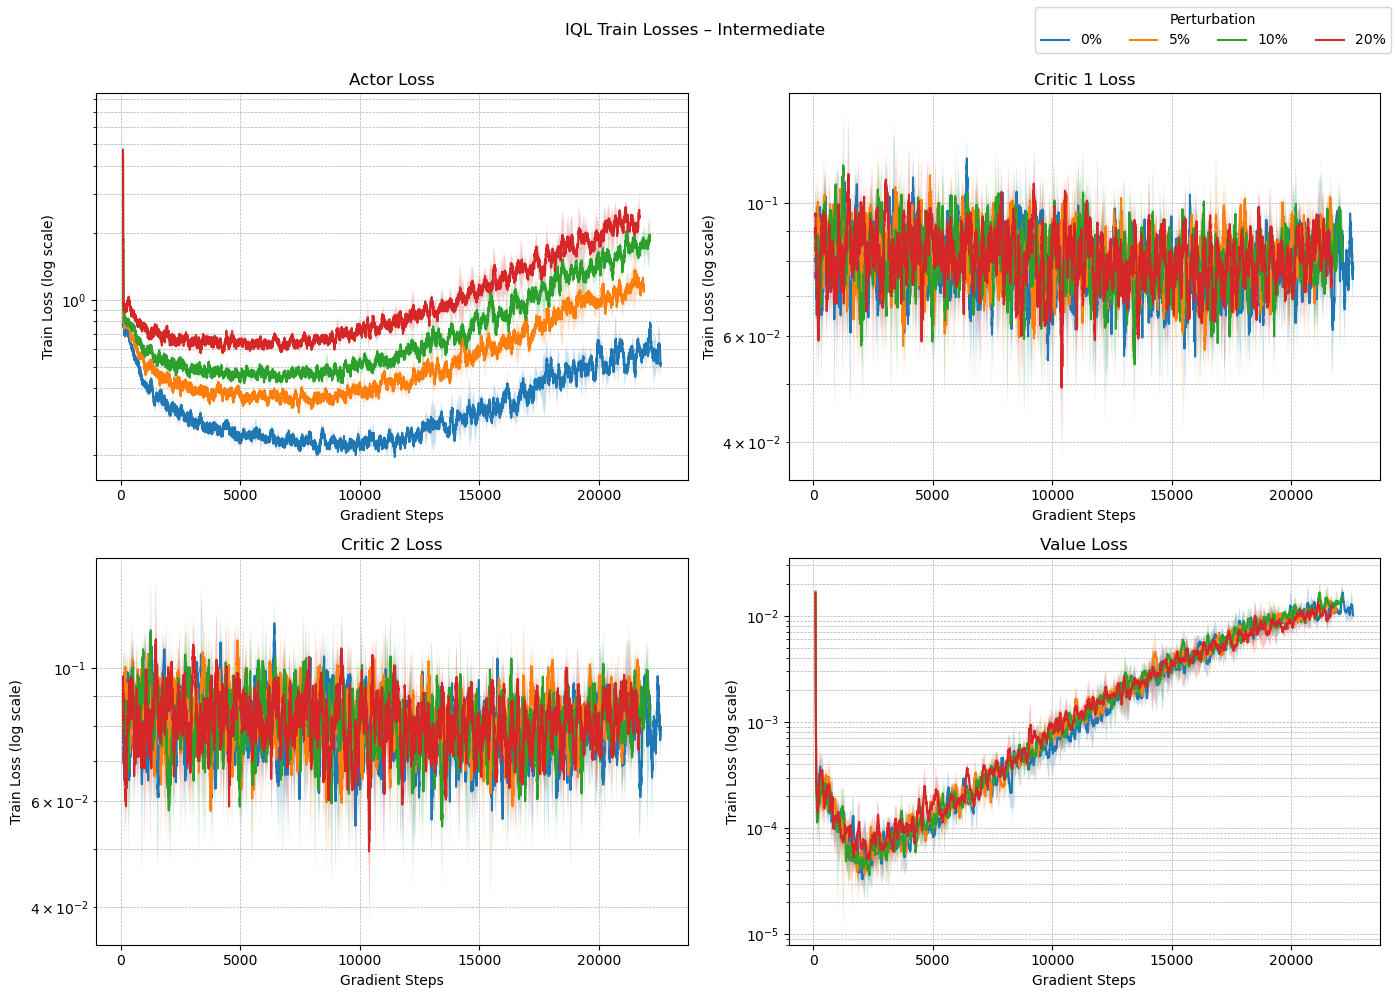

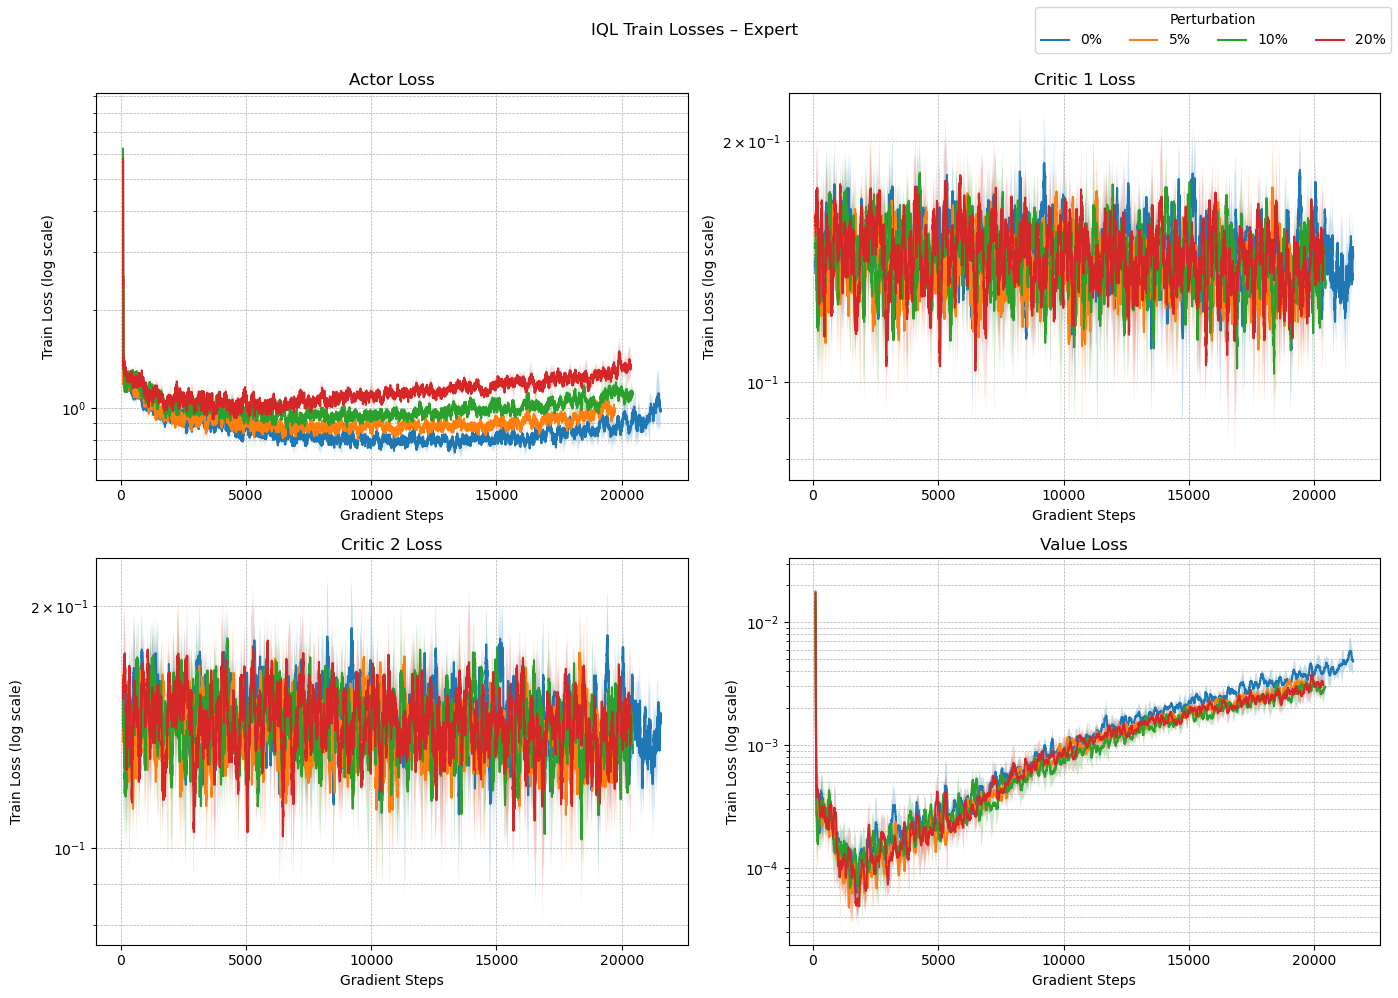

In [ ]:
paths_beginner = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

plot_iql_train_losses(paths_beginner, title="IQL Train Losses – Beginner", window_size=100)
plot_iql_train_losses(paths_intermediate, title="IQL Train Losses – Intermediate", window_size=100)
plot_iql_train_losses(paths_expert, title="IQL Train Losses – Expert", window_size=100)

<h4>Behavioral Cloning (BC) - Validation losses</h4>

In [ ]:
def plot_bc_val_losses(paths, title, window_size=100):
    """
    Plot the validation losses of BC models from multiple paths.

    :param paths: List of paths to the stats files.
    :param title: Title for the plot.
    :param window_size: Size of the moving average window for smoothing.
    """
    all_losses = load_stats(paths)
    plt.figure(figsize=(10, 6))

    for perturb_level, data in sorted(all_losses.items()):
        losses = data['val_losses']
        steps = data['val_steps']

        # trim to minimum length
        min_len = min(len(l) for l in losses)
        losses = [l[:min_len] for l in losses]
        steps = [s[:min_len] for s in steps]
        steps_np = steps[0]

        # smooth each seed run first
        smoothed = []
        for run in losses:
            run_smoothed = np.convolve(run, np.ones(window_size) / window_size, mode='valid')
            smoothed.append(run_smoothed)

        smoothed = np.array(smoothed)
        smoothed_steps = steps_np[window_size - 1:]

        # compute mean ± std across seeds
        mean = np.mean(smoothed, axis=0)
        std = np.std(smoothed, axis=0)

        plt.plot(smoothed_steps, mean, label=f"{perturb_level}%")
        plt.fill_between(smoothed_steps, mean - std, mean + std, alpha=0.2)

    plt.title(title)
    plt.xlabel("Gradient Steps")
    plt.ylabel("Validation Loss (log scale)")
    plt.yscale("log")
    plt.legend(title="Perturbation")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

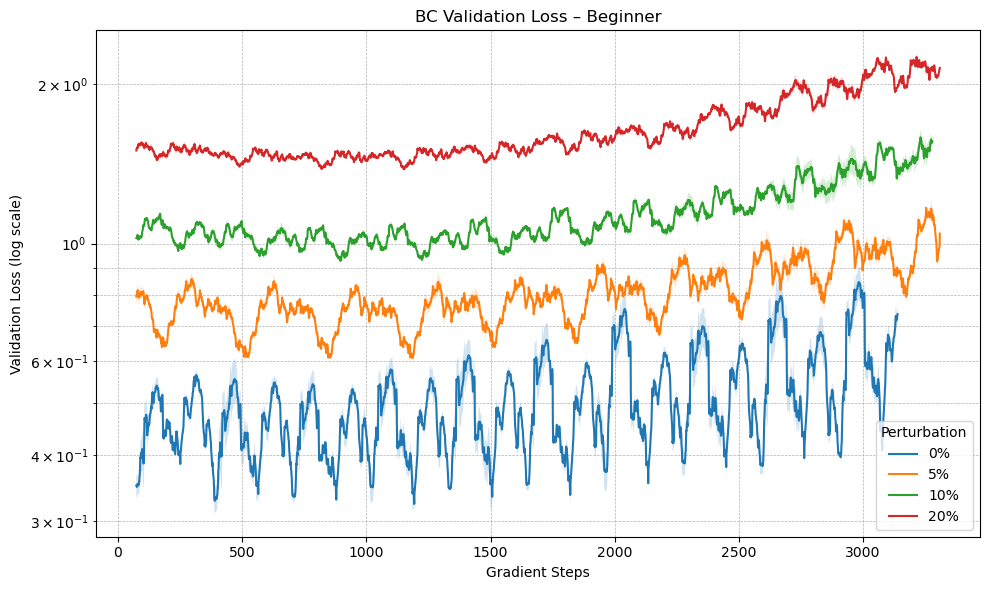

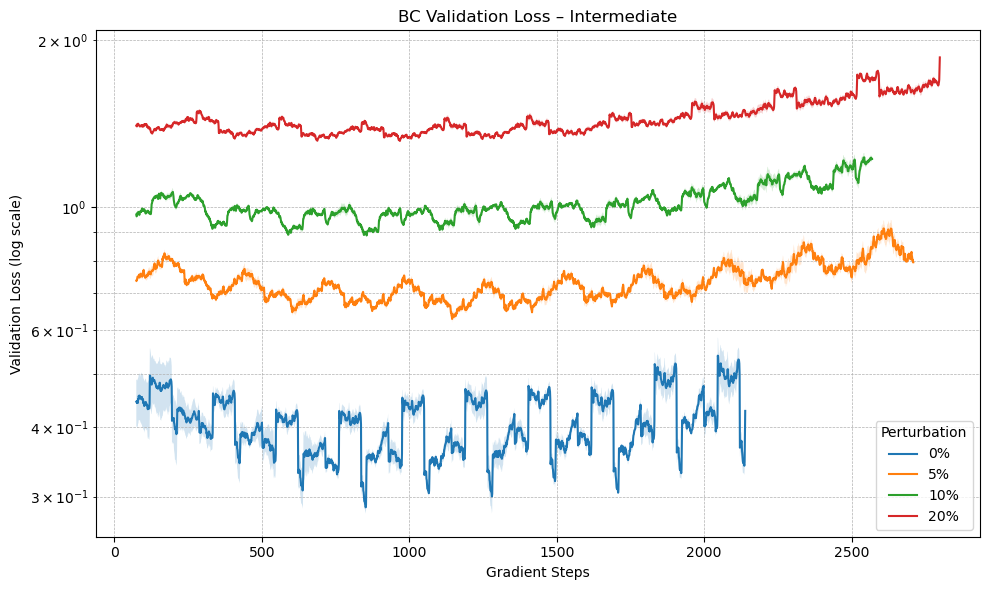

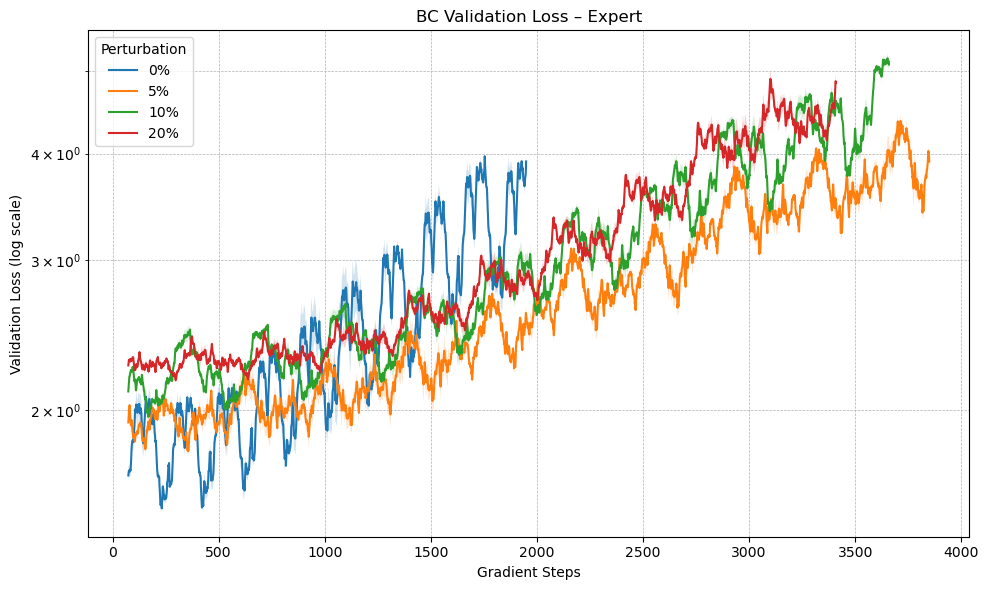

In [ ]:
paths_beginner = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavioral_cloning_bc/bc_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

plot_bc_val_losses(paths_beginner, title="BC Validation Loss – Beginner", window_size=75)
plot_bc_val_losses(paths_intermediate, title="BC Validation Loss – Intermediate", window_size=75)
plot_bc_val_losses(paths_expert, title="BC Validation Loss – Expert", window_size=75)

<h4>Behavior Value Estimation (BVE) - Validation losses</h4>

In [ ]:
def plot_bve_val_losses(paths, title, window_size=100):
    """
    Plot the validation losses of BVE models from multiple paths.

    :param paths: List of paths to the stats files.
    :param title: Title for the plot.
    :param window_size: Size of the moving average window for smoothing.
    """
    all_losses = load_stats(paths)
    plt.figure(figsize=(10, 6))

    for perturb_level, data in sorted(all_losses.items()):
        losses = data['val_losses']
        steps = data['val_steps']

        # trim to minimum length
        min_len = min(len(l) for l in losses)
        losses = [l[:min_len] for l in losses]
        steps = [s[:min_len] for s in steps]
        steps_np = steps[0]

        # smooth each trial individually
        smoothed = []
        for run in losses:
            run_smoothed = np.convolve(run, np.ones(window_size) / window_size, mode='valid')
            smoothed.append(run_smoothed)

        smoothed = np.array(smoothed)
        smoothed_steps = steps_np[window_size - 1:]

        # use mean and standard deviation across seeds
        mean = np.mean(smoothed, axis=0)
        std = np.std(smoothed, axis=0)

        plt.plot(smoothed_steps, mean, label=f"{perturb_level}%")
        plt.fill_between(smoothed_steps, mean - std, mean + std, alpha=0.25)

    plt.title(title)
    plt.xlabel("Gradient Steps")
    plt.ylabel("Train Loss (log scale)")
    plt.yscale("log")
    plt.legend(title="Perturbation")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

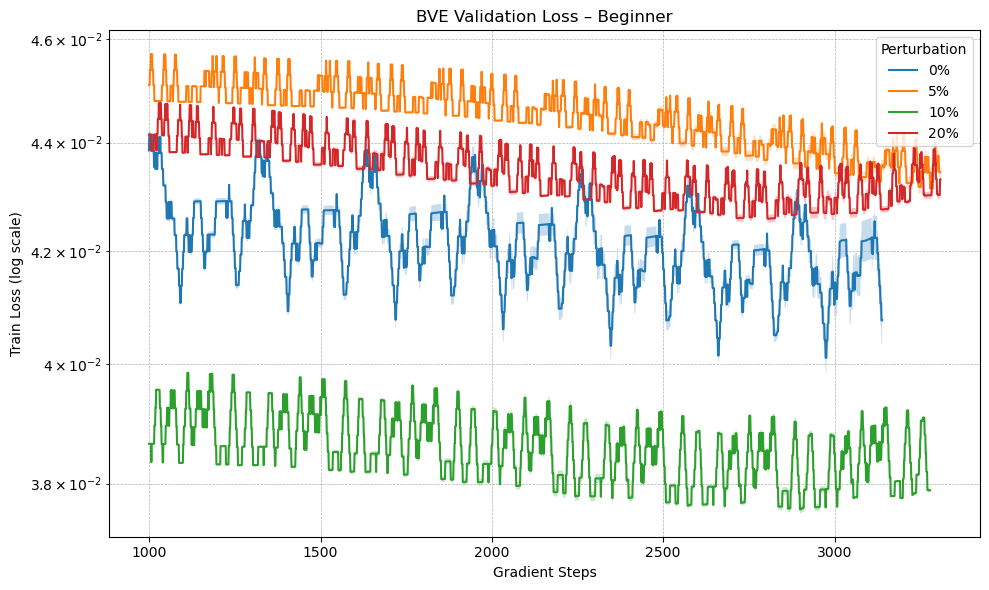

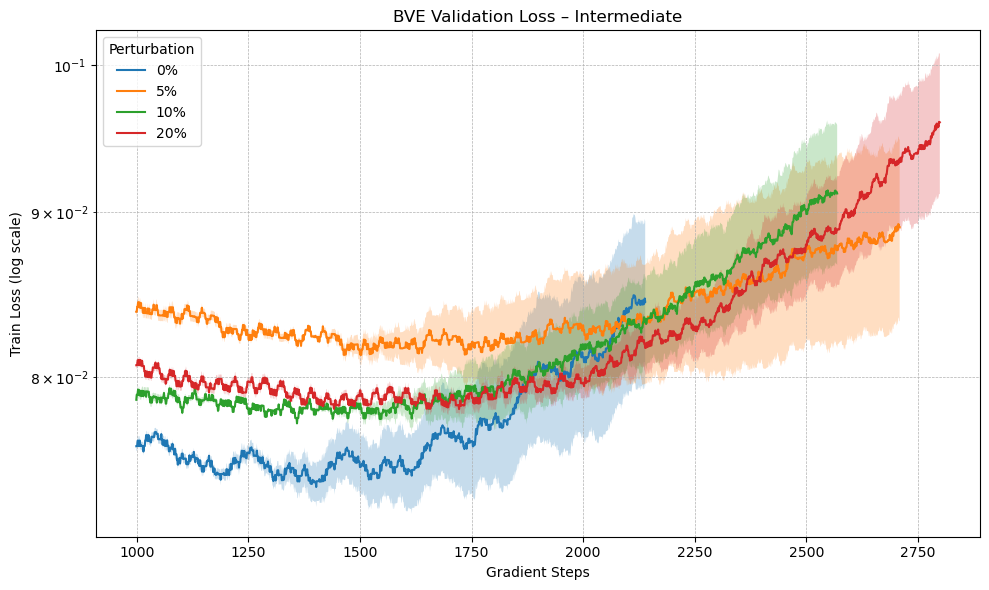

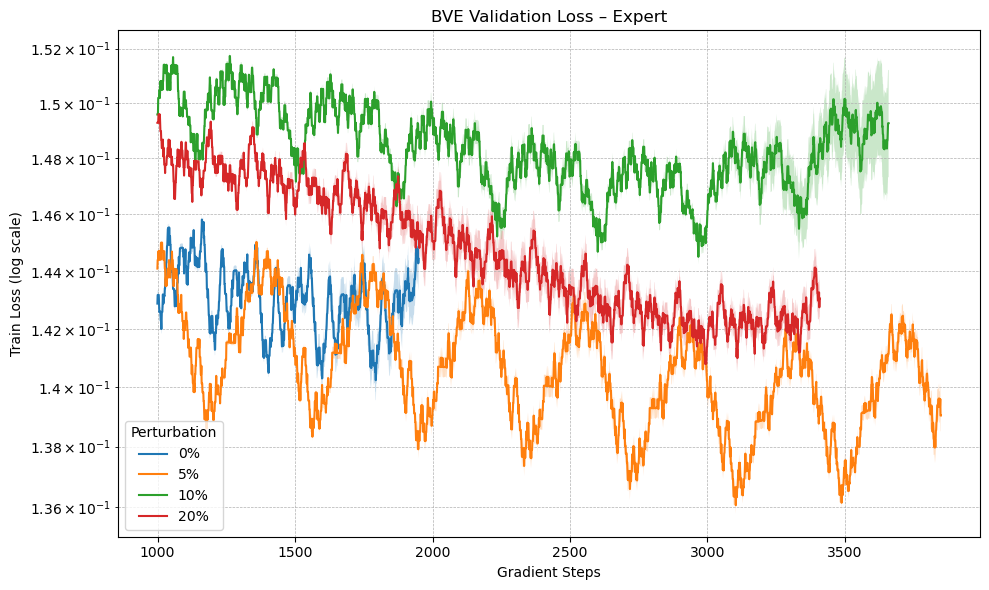

In [ ]:
paths_beginner = [
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/behavior_value_estimation_bve/bve_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

plot_bve_val_losses(paths_beginner, title="BVE Validation Loss – Beginner", window_size=1000)
plot_bve_val_losses(paths_intermediate, title="BVE Validation Loss – Intermediate", window_size=1000)
plot_bve_val_losses(paths_expert, title="BVE Validation Loss – Expert", window_size=1000)

<h4>Implicit Q-Learning (IQL) - Validation losses</h4>

In [ ]:
def load_stats(paths):
    """
    Load IQL stats from multiple perturbation paths and return a dict with
    train losses and steps for each perturb level.

    :param paths: List of paths to the stats files.
    :return: Dictionary with perturbation levels as keys and stats as values.
    """
    all_stats = {}
    for path in paths:
        with open(path, "rb") as f:
            stats = pickle.load(f)
        level = path.split("_")[-1].replace(".pkl", "")
        all_stats[level] = stats
    return all_stats

def plot_iql_val_losses(paths, title, window_size=10):
    """
    Plot the validation losses of IQL models from multiple paths.

    :param paths: List of paths to the stats files.
    :param title: Title for the plot.
    :param window_size: Size of the moving average window for smoothing.
    """
    all_stats = load_stats(paths)
    plt.figure(figsize=(10, 6))

    for perturb_level, stats in sorted(all_stats.items(), key=lambda x: int(x[0].replace("perturb", ""))):
        losses = stats['val_losses']
        steps = stats['val_steps']

        # truncate all runs to the shortest one
        min_len = min(len(l) for l in losses)
        losses = [l[:min_len] for l in losses]
        steps = [s[:min_len] for s in steps]
        steps_np = steps[0]

        # smooth each run
        smoothed = []
        for run in losses:
            smoothed_run = np.convolve(run, np.ones(window_size) / window_size, mode='valid')
            smoothed.append(smoothed_run)

        smoothed = np.array(smoothed)
        smoothed_steps = steps_np[window_size - 1:]

        # compute mean and standard deviation across seeds
        mean = np.mean(smoothed, axis=0)
        std = np.std(smoothed, axis=0)

        label = f"{int(perturb_level.replace('perturb', ''))}%"
        plt.plot(smoothed_steps, mean, label=label)
        plt.fill_between(smoothed_steps, mean - std, mean + std, alpha=0.25)

    plt.title(f"{title}")
    plt.xlabel("Gradient Steps")
    plt.ylabel("Validation Loss (log scale)")
    plt.yscale("log")
    plt.legend(title="Perturbation")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

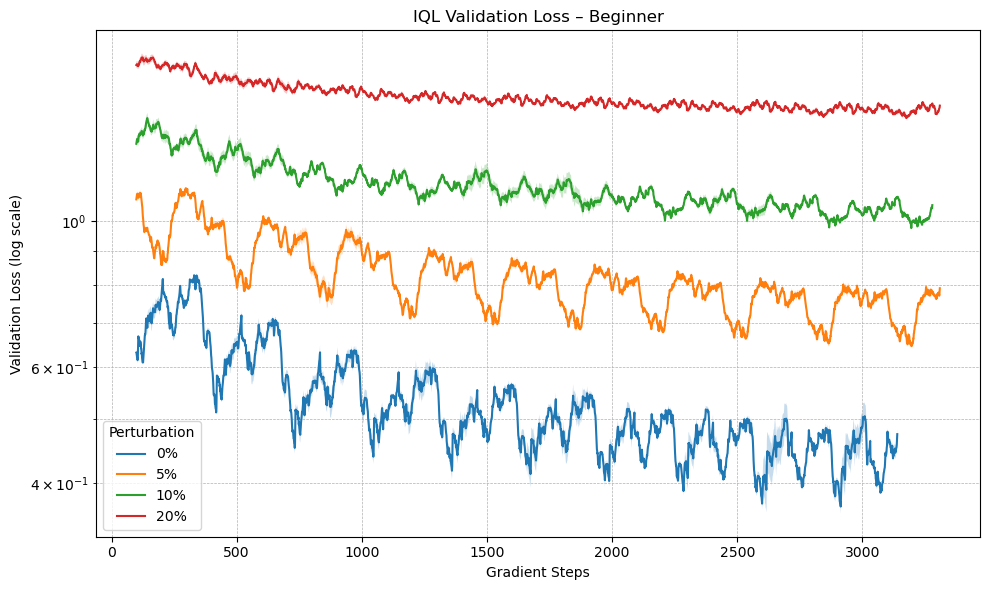

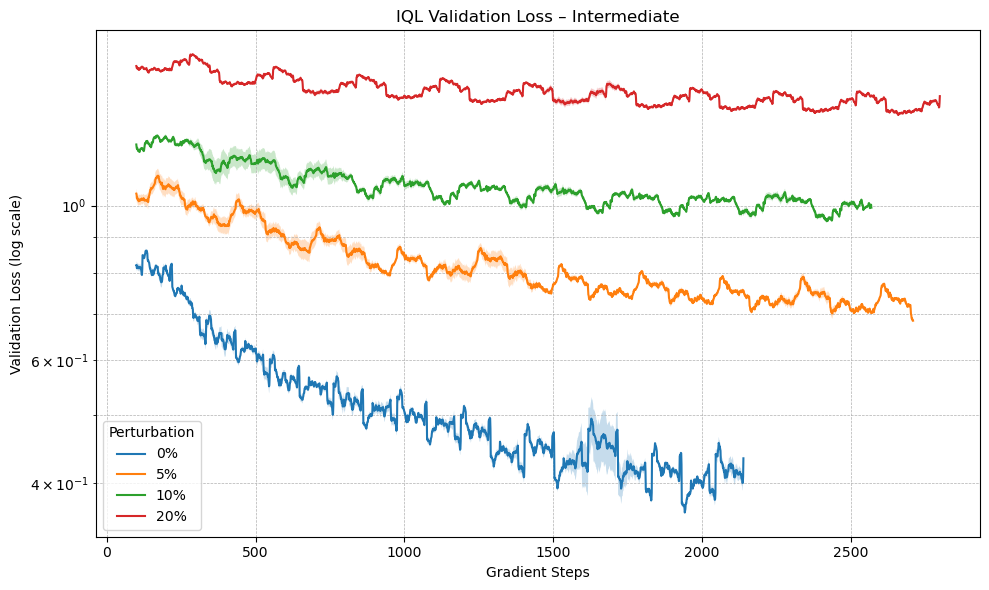

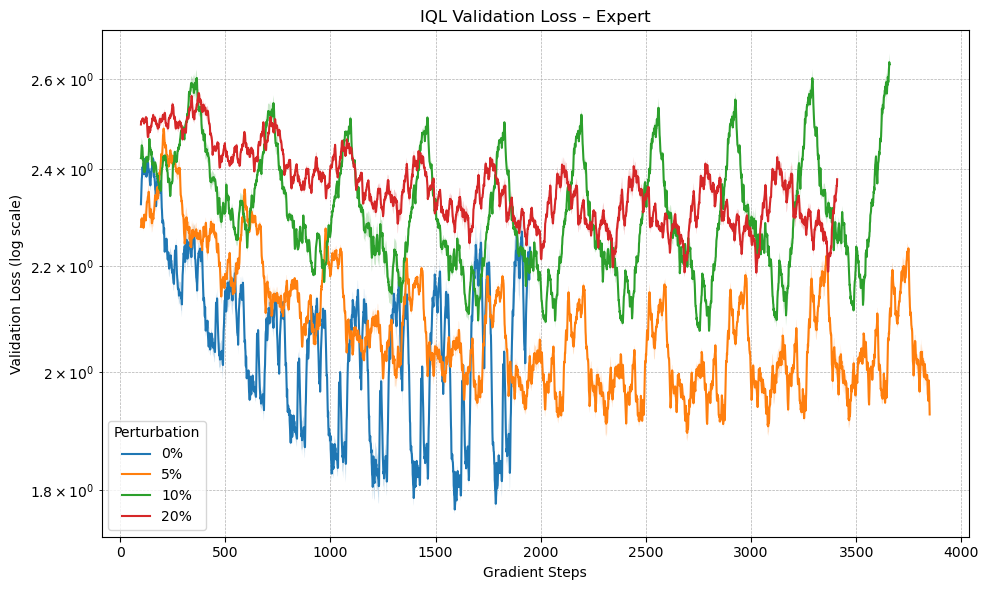

In [ ]:
paths_beginner = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

plot_iql_val_losses(paths_beginner, title="IQL Validation Loss – Beginner", window_size=100)
plot_iql_val_losses(paths_intermediate, title="IQL Validation Loss – Intermediate", window_size=100)
plot_iql_val_losses(paths_expert, title="IQL Validation Loss – Expert", window_size=100)

<div id='qvalue_plotting'>
<h2 style="color:rgb(0,120,170)">Q-Value Plotting</h2>

In this section, we will plot the Q-values estimated by the Implicit Q-Learning (IQL) algorithm. Also we will calculate the average predicted and target Q-values across different perturbation levels. The plots will visualize the dynamics of Q-values during training, providing insights into the learning process of IQL.

In [ ]:
def load_q_values(stats_path):
    """
    Load Q-values from a given stats path.

    :param stats_path: Path to the stats file.
    :return: Dictionary of Q-values.
    """
    with open(stats_path, "rb") as f:
        stats = pickle.load(f)
    return stats["q_values"]

def plot_q_values(q_values_dict, title):
    """
    Plot the average predicted and target Q-values from a dictionary of Q-values.

    :param q_values_dict: Dictionary with perturbation levels as keys and Q-values as values.
    :param title: Title for the plot.
    """
    perturb_levels = sorted(q_values_dict.keys(), key=lambda x: int(x.replace("perturb", "")))

    plt.figure(figsize=(10, 6))

    for perturb in perturb_levels:
        q_values = q_values_dict[perturb]
        pred_all_seeds = []
        tgt_all_seeds = []

        for seed_dict in q_values.values():
            pred_q = seed_dict["avg_pred_q_values"]
            tgt_q = seed_dict["avg_target_q_values"]

            shared_steps = sorted(set(pred_q.keys()) & set(tgt_q.keys()))
            pred_vals = np.array([pred_q[step][0] for step in shared_steps])
            tgt_vals = np.array([tgt_q[step][0] for step in shared_steps])

            pred_all_seeds.append(pred_vals)
            tgt_all_seeds.append(tgt_vals)

        min_len = min(min(len(p), len(t)) for p, t in zip(pred_all_seeds, tgt_all_seeds))
        pred_all_seeds = [p[:min_len] for p in pred_all_seeds]
        tgt_all_seeds = [t[:min_len] for t in tgt_all_seeds]
        steps = np.arange(min_len)

        pred_all_seeds = np.array(pred_all_seeds)
        tgt_all_seeds = np.array(tgt_all_seeds)

        pred_mean = pred_all_seeds.mean(axis=0)
        tgt_mean = tgt_all_seeds.mean(axis=0)

        plt.plot(steps, pred_mean, label=f"Predicted Q")
        plt.plot(steps, tgt_mean, label=f"Target Q", alpha=0.6)

    plt.title(title)
    plt.xlabel("Gradient Step")
    plt.ylabel("Average Q-Value")
    plt.legend(title="Q-Value Type")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

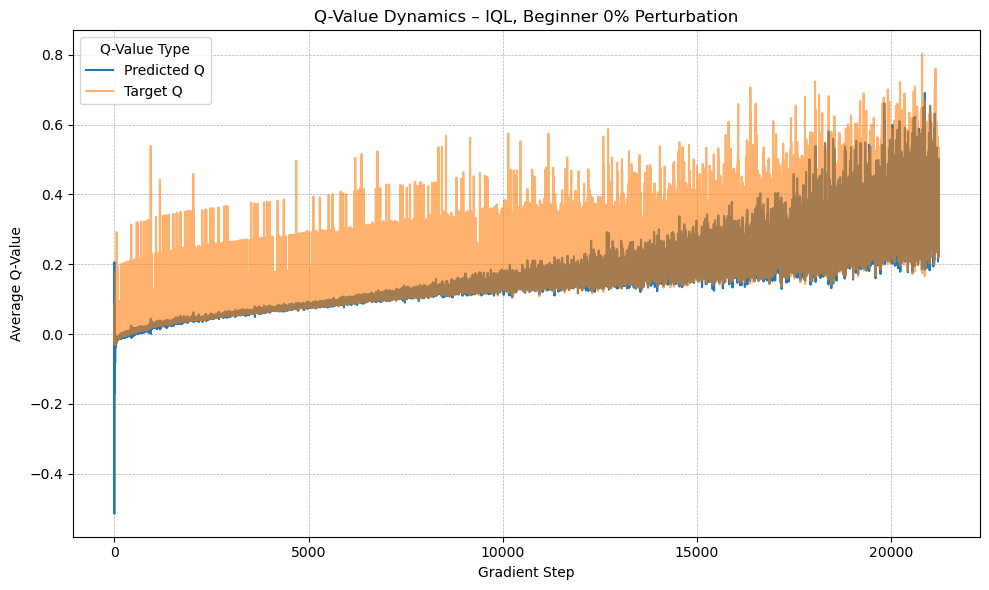

In [ ]:

paths_beginner = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

q_values_dict = {"perturb0": load_q_values(paths_beginner[0])}
plot_q_values(q_values_dict, title="Q-Value Dynamics – IQL, Beginner 0% Perturbation")

In [ ]:
def analyze_q_values(stats_path):
    """
    Analyze Q-values from a given stats path and compute various statistics.

    :param stats_path: Path to the stats file.
    :return: Dictionary with computed statistics.
    """
    with open(stats_path, "rb") as f:
        stats = pickle.load(f)

    q_all_pred = []
    q_all_target = []

    # loop over all seeds
    for seed_data in stats['q_values'].values():
        pred_q_dict = seed_data['avg_pred_q_values']
        target_q_dict = seed_data['avg_target_q_values']

        # ensure consistent ordering by step
        steps = sorted(pred_q_dict.keys())
        pred_q = [pred_q_dict[s][0] for s in steps]
        target_q = [target_q_dict[s][0] for s in steps]

        q_all_pred.extend(pred_q)
        q_all_target.extend(target_q)

    # convert to numpy arrays
    q_all_pred = np.array(q_all_pred)
    q_all_target = np.array(q_all_target)

    # compute statistics
    mean_pred = np.mean(q_all_pred)
    mean_target = np.mean(q_all_target)
    final_pred = q_all_pred[-1]
    final_target = q_all_target[-1]

    # cosine similarity (reshaped to 2D for sklearn)
    cos_sim = cosine_similarity(q_all_pred.reshape(1, -1), q_all_target.reshape(1, -1))[0][0]

    # percentage where predicted Q <= target Q
    percent_under_target = np.mean(q_all_pred <= q_all_target) * 100

    # print results
    print(f"Mean Predicted Q: {mean_pred:.4f}")
    print(f"Mean Target Q:    {mean_target:.4f}")
    print(f"Final Predicted Q: {final_pred:.4f}")
    print(f"Final Target Q:    {final_target:.4f}")
    print(f"Cosine Similarity: {cos_sim:.4f}")
    print(f"% Steps where Predicted Q ≤ Target Q: {percent_under_target:.2f}%")

    return {
        "mean_pred_q": mean_pred,
        "mean_target_q": mean_target,
        "final_pred_q": final_pred,
        "final_target_q": final_target,
        "cosine_similarity": cos_sim,
        "percent_under_target": percent_under_target
    }


In [3]:
paths_beginner = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb20/stats_perturb20.pkl",
]

paths_intermediate = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_intermediate/perturb20/stats_perturb20.pkl",
]

paths_expert = [
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb0/stats_perturb0.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb5/stats_perturb5.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb10/stats_perturb10.pkl",
    "offline_rl_models/implicit_q_learning_iql/iql_logs/seaquest_expert/perturb20/stats_perturb20.pkl",
]

for path in paths_beginner:
    print(f"Analyzing Q-values for Beginner:")
    analyze_q_values(path)
    print("\n" + "="*50 + "\n")

for path in paths_intermediate:
    print(f"Analyzing Q-values for Intermediate:")
    analyze_q_values(path)
    print("\n" + "="*50 + "\n")

for path in paths_expert:
    print(f"Analyzing Q-values for Expert:")
    analyze_q_values(path)
    print("\n" + "="*50 + "\n")


Analyzing Q-values for Beginner:
Mean Predicted Q: 0.1599
Mean Target Q:    0.1984
Final Predicted Q: 0.8919
Final Target Q:    0.9361
Cosine Similarity: 0.8954
% Steps where Predicted Q ≤ Target Q: 49.14%


Analyzing Q-values for Beginner:
Mean Predicted Q: 0.1502
Mean Target Q:    0.1893
Final Predicted Q: 0.1900
Final Target Q:    0.2187
Cosine Similarity: 0.8778
% Steps where Predicted Q ≤ Target Q: 46.47%


Analyzing Q-values for Beginner:
Mean Predicted Q: 0.1201
Mean Target Q:    0.1606
Final Predicted Q: 0.2020
Final Target Q:    0.2023
Cosine Similarity: 0.8442
% Steps where Predicted Q ≤ Target Q: 46.71%


Analyzing Q-values for Beginner:
Mean Predicted Q: 0.1669
Mean Target Q:    0.2131
Final Predicted Q: 0.5104
Final Target Q:    0.4990
Cosine Similarity: 0.8845
% Steps where Predicted Q ≤ Target Q: 46.61%


Analyzing Q-values for Intermediate:
Mean Predicted Q: 0.5234
Mean Target Q:    0.5927
Final Predicted Q: 1.8069
Final Target Q:    1.8168
Cosine Similarity: 0.9789
% S